In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
sb.set()

In [67]:
data = pd.read_csv('data.csv')
data = data.drop("Attrition", axis=1)
resp = pd.read_csv("data.csv",usecols = ['Attrition'])


# Logistic Regression with MonthlySalary

Accuracy: 0.49728260869565216
              precision    recall  f1-score   support

           0       0.89      0.48      0.62       320
           1       0.15      0.60      0.24        48

    accuracy                           0.50       368
   macro avg       0.52      0.54      0.43       368
weighted avg       0.79      0.50      0.57       368



c:\Users\yingh\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<AxesSubplot:>

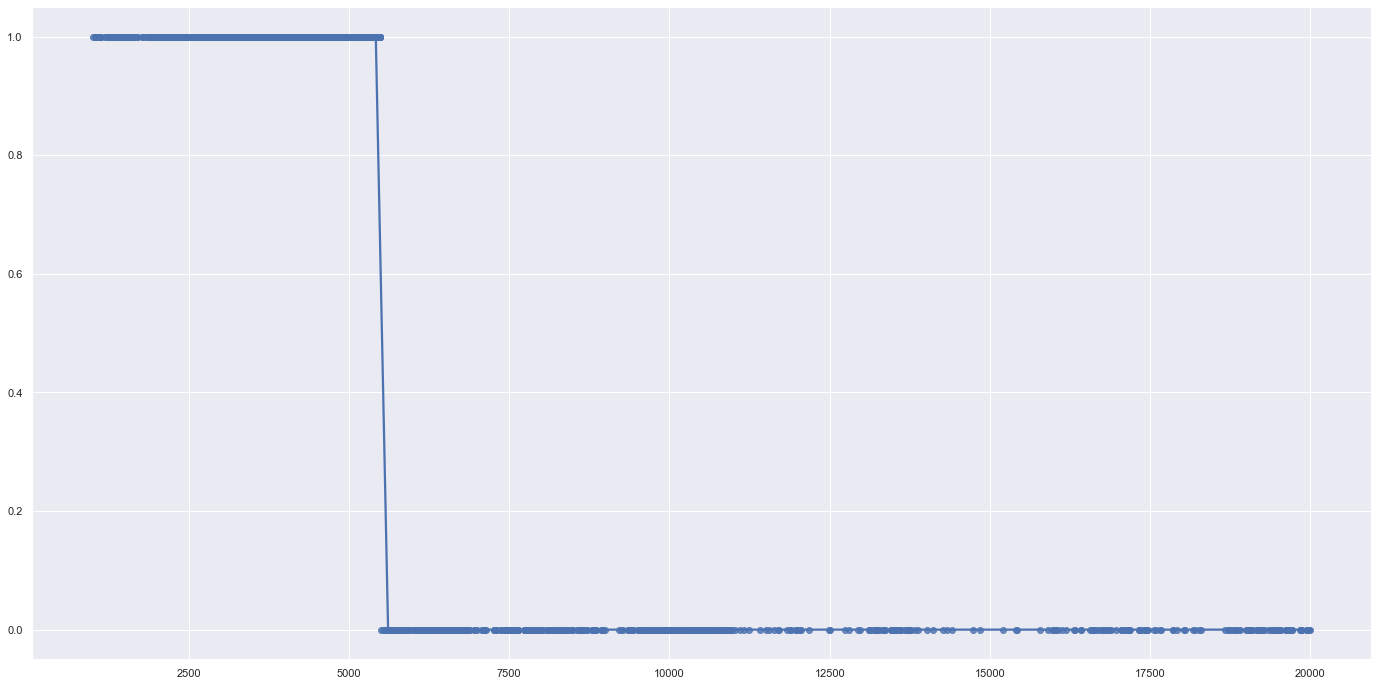

In [71]:
from imblearn.over_sampling import SMOTE 
resp['attrition_binary'] = resp["Attrition"].apply(lambda x: 1 if x == 'Yes' else 0)
LogReg = LogisticRegression(max_iter=1000)
x_train, x_test, y_train, y_test = train_test_split(data["MonthlyIncome"], resp['attrition_binary'], test_size=0.25, random_state=42)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
oversampler= SMOTE(random_state=0)
x_train, y_train = oversampler.fit_resample(x_train,y_train)
LogReg.fit(x_train, y_train)

y_test_pred = LogReg.predict(x_test)
print("Accuracy:", LogReg.score(x_test, y_test))
print(classification_report(y_test, y_test_pred))

f, axes = plt.subplots(figsize=(24,12))
sb.regplot(x=x_train, y=y_train_pred, logistic=True, ci=None)

# Logistic Regression with JobLevel

Accuracy: 0.6875
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       320
           1       0.20      0.46      0.28        48

    accuracy                           0.69       368
   macro avg       0.55      0.59      0.54       368
weighted avg       0.81      0.69      0.73       368



<AxesSubplot:>

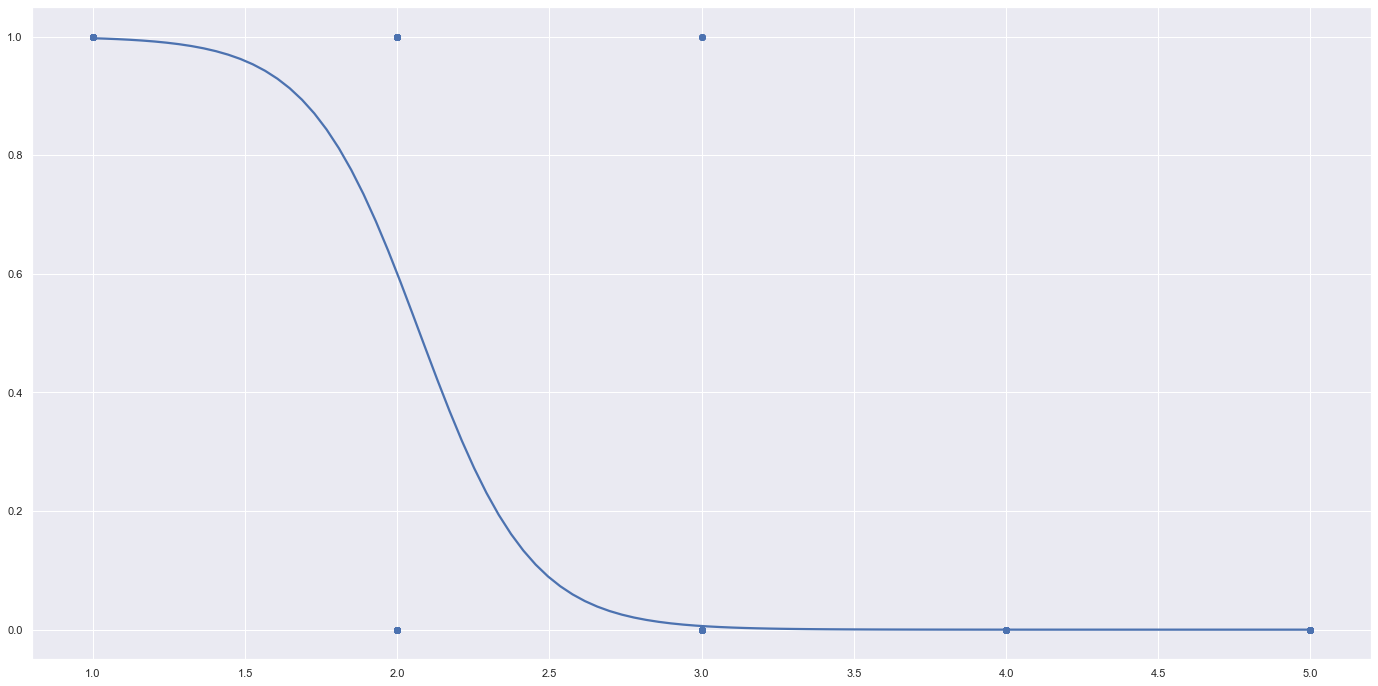

In [72]:
LogReg = LogisticRegression(max_iter=1000)
x_train, x_test, y_train, y_test = train_test_split(data["JobLevel"], resp['attrition_binary'], test_size=0.25, random_state=42)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
oversampler= SMOTE(random_state=0)
x_train, y_train = oversampler.fit_resample(x_train,y_train)
LogReg.fit(x_train, y_train)

y_test_pred = LogReg.predict(x_test)

print("Accuracy:", LogReg.score(x_test, y_test))
print(classification_report(y_test, y_test_pred))

f, axes = plt.subplots(figsize=(24,12))
sb.regplot(x=x_train, y=y_train_pred, logistic=True, ci=None)